In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras import models
from keras import layers
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder
import numpy as np

Using TensorFlow backend.


In [2]:
###################################################################
################## PREPARING THE DATA #############################
###################################################################

In [3]:
dataset = pd.read_csv('master.csv')
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
dataset.keys()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#First what we need to do is normalizing the data
#taking a look at the data we can see that there are categorical and numerical values

#Categorical values: country, sex, generation

#Numerical values: year, age, population, suicides/100k pop
#HDI for year, gdp_for_year ($),  gdp_per_capita ($)

#For now, lets, drop country-year column


In [6]:
####################################################################
###################  ONE-HOT-ENCODED COLUMNS #######################
####################################################################


dataset['country'].unique()
dataset['country'] = pd.get_dummies(dataset['country'])
dataset['sex'] = pd.get_dummies(dataset['sex'])
dataset['generation'] = pd.get_dummies(dataset['generation'])
dataset['year'] = pd.get_dummies(dataset['year'])
#The column 'age' is batched already
dataset['age'] = pd.get_dummies(dataset['age'])



In [7]:
####################################################################
##############  NORMALIZING NUMERICAL COLUMNS ######################
####################################################################
# defining function for normalizing numeric columns
def norm_data(feat_column):
    mean = feat_column.mean(axis = 0)
    feat_column -= mean
    std = feat_column.std(axis = 0)
    feat_column /= std
    return feat_column 


dataset['population'] = norm_data(dataset['population'])
dataset['suicides/100k pop'] = norm_data(dataset['suicides/100k pop'])
dataset['HDI for year'] = norm_data(dataset['HDI for year'])
dataset['gdp_per_capita ($)'] = norm_data(dataset['gdp_per_capita ($)'])



In [8]:
###Popping this columns because I am not going to use them
dataset.pop('country-year')
dataset.pop(' gdp_for_year ($) ')

0         2,156,624,900
1         2,156,624,900
2         2,156,624,900
3         2,156,624,900
4         2,156,624,900
5         2,156,624,900
6         2,156,624,900
7         2,156,624,900
8         2,156,624,900
9         2,156,624,900
10        2,156,624,900
11        2,156,624,900
12        2,126,000,000
13        2,126,000,000
14        2,126,000,000
15        2,126,000,000
16        2,126,000,000
17        2,126,000,000
18        2,126,000,000
19        2,126,000,000
20        2,126,000,000
21        2,126,000,000
22        2,126,000,000
23        2,126,000,000
24        2,335,124,988
25        2,335,124,988
26        2,335,124,988
27        2,335,124,988
28        2,335,124,988
29        2,335,124,988
              ...      
27790    51,821,573,338
27791    51,821,573,338
27792    51,821,573,338
27793    51,821,573,338
27794    51,821,573,338
27795    51,821,573,338
27796    57,690,453,461
27797    57,690,453,461
27798    57,690,453,461
27799    57,690,453,461
27800    57,690,

In [9]:
#Checking what columns we have..the target is suicides_no
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
0,1,0,0,1,21,-0.391610,-0.322026,NaN,-0.850848,0
1,1,0,0,0,16,-0.392863,-0.402188,NaN,-0.850848,0
2,1,0,1,1,14,-0.397541,-0.421174,NaN,-0.850848,0
3,1,0,0,0,1,-0.466027,-0.433831,NaN,-0.850848,0
4,1,0,0,0,9,-0.401478,-0.502919,NaN,-0.850848,1


In [10]:
#checking then number of samples we have and defining the target

print(dataset['suicides_no'].count())
target = dataset.pop('suicides_no')

27820


In [11]:
####################################################################
##############  TRAINING, VALIDATION AND TEST SETS #################
####################################################################


x_train = dataset[:20000]
x_val = dataset[20000:24000]
x_test = dataset[24000:]

y_train = target[:20000]
y_val = target[20000:24000]
y_test = target[24000:]


In [21]:
####################################################################
#####################  BUILDING THE MODEL ##########################
####################################################################

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (9,)))
model.add(layers.Dense(64, activation = 'relu')) 
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))
    
model.compile(optimizer = 'rmsprop',
                 loss = 'mse',
                 metrics = ['accuracy'])
    
history = model.fit(x_train, y_train,
             epochs  = 100,
             batch_size = 512,
             validation_data = (x_val, y_val))



Train on 20000 samples, validate on 4000 samples
Epoch 1/100
20000/20000 [==============================] - 0s 20us/step - loss: nan - acc: 0.0014 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/100
20000/20000 [==============================] - 0s 5us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/100
20000/20000 [==============================] - 0s 6us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/100
20000/20000 [==============================] - 0s 4us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/100
20000/20000 [==============================] - 0s 6us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/100
20000/20000 [==============================] - 0s 6us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/100
20000/20000 [==============================] - 0s 4us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - v

In [22]:
#Here I'm checking the keys to include them when plotting
history_dict = history.history.keys()
history_dict

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

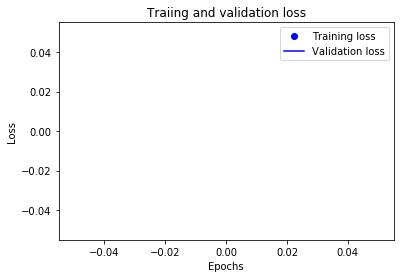

In [14]:
####################################################################
##################  PLOTTING THE LOSS GRAPH ########################
####################################################################
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Traiing and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

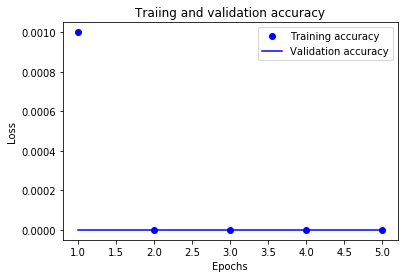

In [15]:
####################################################################
##############  PLOTTING THE ACCURACY GRAPH ########################
####################################################################
loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title("Traiing and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
####################################################################
##############  EVALUATION ON THE TEST DATA ########################
####################################################################

results = model.evaluate(x_test, y_test) 
print('Accuracy: ', results[1])

3820/3820 [==============================] - 0s 11us/step
Accuracy:  0.0
